## Learning outcomes

1. Load, save and show images
2. Load, show and save videos
3. Image resizing


## Why OpenCV? 
-compatible with multiple major OS, like Windows, Linux, and even MacOS. 
Written in different languages like PYthon and C++ and Java
-Interoperable with Numpy module, thereby enable fast computation of image array
-There are a lot of useful resources online like articles and stack overflow posts. Large community support. 

## Types of image files (formats) 
- JPEG (.jpg, .jpeg, .jfif)
 * used in photos stored in camera or mobile phone 
- PNG (.png)
 * lossless compression, used in webpage and file transfer 
- webp (.webp) 
 * introduced in 2015 by Google. Smaller file size compared to JPG and PNG -> more efficient in file transfer
-tiff (.tif) 
 * printing (high-quality), large file size
-bitmap (.bmp) 
 * multipurpose but large file size 
-gif (.gif) 
 * animation (OpenCV cant handle GIF file) 

## Setup

In [7]:
import sys
# at least python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv


In [8]:
print(cv.__version__)

4.6.0


## Load and show images

In [4]:
img = cv.imread('images/lena.jfif')
grayscale = cv.imread('images/lena.jfif', 0)
#second argument: flags, 1 (default): color image, 0 (grayscale), -1: cv.IMREAD_UNCHANGED

cv.imshow('lena_color', img)
cv.imshow('grayscale', grayscale)
cv.waitKey(0) #keybinding function: wait for user response
cv.destroyAllWindows()

In [3]:
def show_img(window_name, img): 
    """2 arguments: window name and image"""
    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [6]:
img = cv.imread('images/lena.png')

show_img('png image', img)

In [7]:
# show the differences between png and jpeg

img_png = cv.imread("images/lena.png", -1)
img_jpeg = cv.imread("images/lena.jfif", -1)

print(f"The shape of png image: {img_png.shape}")
print(f"The shape of jpeg image: {img_jpeg.shape}")

The shape of png image: (225, 225, 4)
The shape of jpeg image: (225, 225, 3)


## GIF problem

In [8]:
!pip install imageio

In [9]:
import imageio 

In [10]:
GIF = imageio.mimread("images/rotating_earth_large.gif")
# convert RGB to BGR
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

for img in imgs: 
    cv.imshow("GIF", img)
    cv.waitKey(200) #wait for 0.2 second user input
    
cv.destroyAllWindows()

## save images
'''
cv.imwrite(filepath, img
'''

In [13]:
#formalized way to load, show and save images
img = cv.imread("images/lena.jfif")

cv.imshow('lena', img)
k = cv.waitKey(0) & 0xFF
if k == ord("s"): #press 's' key
    cv.imwrite('lena_save.jpg', img)
    
cv.destroyAllWindows()

In [16]:
# img = cv.imread(cv.samples.findFile("images/lena.jfif"))

# if img is None: 
#     sys.exit("No such file!")

## Video operations
Load and show videos

In [22]:
#Create a VideoCapture object
cap = cv.VideoCapture('videos/img_pexels.mp4')

# Check if the object has been created successfully
if not cap.isOpened():
    raise Exception("No video detected")
    
# Read the frames with loop
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
        
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.imshow('frame', frame)
    # Press Esc key to exit (27 is ASCII code for Esc). cv.waitKey() returns 32 bit integer values. You can find the ASCII table
    # on this URL: https://theasciicode.com.ar/
    if cv.waitKey(1) & 0xFF == 27:
        break
        
cap.release()
cv.destroyAllWindows()

## webcam 
show webcam recording and save

In [10]:
cap = cv.VideoCapture(0)
if not cap.isOpened(): 
    sys.exit('no webcam detected!')
    
#object that can handle save videls
#arguments: filepath, fourcc, fps, width and height

fps = 15
w,h = int(cap.get(3)), int(cap.get(4))
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
out = cv.VideoWriter('videos/out.avi', fourcc, fps, (w,h))

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
        
    out.write(frame)
        
#     cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.namedWindow("frame")
    cv.imshow('frame', frame)
    # Press Esc key to exit (27 is ASCII code for Esc). cv.waitKey() returns 32 bit integer values. You can find the ASCII table
    # on this URL: https://theasciicode.com.ar/
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
out.release()
cv.destroyAllWindows()

In [41]:
import time #try to find out fps of the camera/video

In [42]:
#Create a VideoCapture object
cap = cv.VideoCapture('videos/img_pexels.mp4')

# Check if the object has been created successfully
if not cap.isOpened():
    raise Exception("No video detected")
    
start = time.time()
# Read the frames with loop
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
        
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.imshow('frame', frame)
    # Press Esc key to exit (27 is ASCII code for Esc). cv.waitKey() returns 32 bit integer values. You can find the ASCII table
    # on this URL: https://theasciicode.com.ar/
    if cv.waitKey(1) & 0xFF == 27:
        break

end = time.time()
cap.release()
cv.destroyAllWindows()

In [43]:
print(f'the fps if we play the video using software: {cap.get(5)}')
n_frames = cap.get(7)
print(f"the fps if we use OPENCV imshow: {n_frames/ (end - start)}")

the fps if we play the video using software: 0.0
the fps if we use OPENCV imshow: 0.0


## Image resizing
1. Set arbitrary sizes (w,h) 
2. scale factor

In [32]:
#1 method
img = cv.imread("images/soccer.jpg")

#arguments: source image, tuple of new width and height, fx, fy, interpolation methods
new_width = 300
new_height = 450

img_resize = cv.resize(img, (new_width, new_height))

cv.imshow('img', img)
show_img("resize", img_resize)

In [33]:
img.shape

(1200, 800, 3)

In [34]:
img_resize.shape

(450, 300, 3)

In [40]:
# 2 method
img = cv.imread('images/lena.jfif')
factor = 1.3
img_resize = cv.resize(img, None, fx = factor, fy = factor)

cv.imshow('images', img)
show_img(f'resize with factor: {factor}', img_resize)

## Exercises

Q1. Load and display the image 'dog.jfif'. Save the image in png format.

In [6]:
img = cv.imread('images/dog.jfif')

show_img('doge', img)
cv.imwrite('doge_save.png', img)

True

Q2. Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [48]:
#first way
img = cv.imread("images/lena.jfif")
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('original', img)
show_img('grayscale', grayscale)

In [49]:
#second way, use matplotlib module
import matplotlib.pyplot as plt


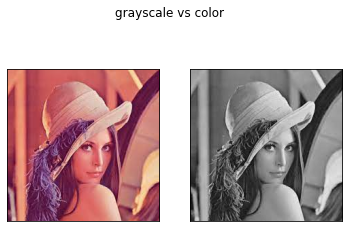

In [51]:
#change BGR2RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121) #first figure
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122) #second figure
plt.imshow(grayscale, cmap = plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle('grayscale vs color')
plt.show()

Q3. Write codes that performs the following:
- Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
- Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"

In [24]:
# cap = cv.VideoCapture(0)
cap = cv.VideoCapture('videos/img_pexels.mp4')
if not cap.isOpened(): 
    sys.exit('no webcam detected!')
    
#object that can handle save videls
#arguments: filepath, fourcc, fps, width and height

fps = 15
w,h = int(cap.get(3)), int(cap.get(4))
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
# out = cv.VideoWriter('videos/out.avi', fourcc, fps, (w,h))
out = cv.VideoWriter('videos/smaller_img_pexels.avi', fourcc, fps, (int(w/3),int(h/3)))

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
    
    frame = cv.resize(frame, (int(w/3),int(h/3)))
    out.write(frame)
        
#     cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.namedWindow("frame")
    cv.imshow('frame', frame)
    # Press Esc key to exit (27 is ASCII code for Esc). cv.waitKey() returns 32 bit integer values. You can find the ASCII table
    # on this URL: https://theasciicode.com.ar/
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
out.release()
cv.destroyAllWindows()

Q4. Enlarge the image "dog.jfif" by using different techniques: 1) Linear interpolation, 2) Cubic interpolation and 3) nearest neighbor interpolation. Comment on the upscaled of all the outputs.

In [27]:
# 1. Linear interpolation
img = cv.imread('images/dog.jfif')
img_enlarged = cv.resize(img, None, fx = 2, fy = 2, interpolation = cv.INTER_LINEAR)

show_img('doge', img_enlarged)

In [28]:
# 2. Cubic interpolation
img = cv.imread('images/dog.jfif')
img_enlarged = cv.resize(img, None, fx = 2, fy = 2, interpolation = cv.INTER_CUBIC)

show_img('doge', img_enlarged)

In [29]:
# 3. Nearest neighbor interpolation
img = cv.imread('images/dog.jfif')
img_enlarged = cv.resize(img, None, fx = 2, fy = 2, interpolation = cv.INTER_NEAREST)

show_img('doge', img_enlarged)